# Configuring Axes

*Tyler Caraza-Harter* and *Meenakshi Syamkumar*

In this notebook, we'll introduce the following:
1. how to set axes limits
2. how to use a log axis
3. how to setup multiple plot areas

We'll also get some practice choosing the right plot for the situation.

Let's do our boilerplate setup, then start by revisiting the Iris dataset introduced previously.

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
import requests

In [4]:
response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
response.raise_for_status()

iris_fh = open("iris.data", "w")
iris_fh.write(response.text)
iris_fh.close()

df = pd.read_csv('iris.data',
                 names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df.head()

,sepal-len,sepal-wid,petal-len,petal-wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal-len,sepal-wid,petal-len,petal-wid,name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Let's plot the petal dimensions of the Virginica variety.

In [6]:
df = df[df['name'] == 'Iris-virginica']
df.head()

,sepal-len,sepal-wid,petal-len,petal-wid,name
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='petal-len', ylabel='petal-wid'>

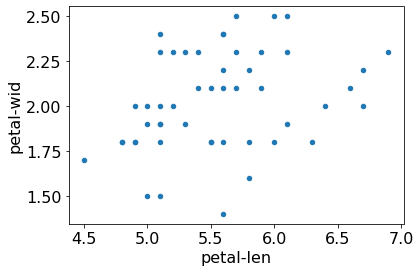

In [7]:
df.plot.scatter(x='petal-len', y='petal-wid')

**Problem**: it's very hard in the above plot to see any correlation between length and width.  This is because the plot origin is not at 0,0.  This makes the data look scattered over the whole area.  We can use `xlim=VAL` and `ylim=VAL` arguments to force the origin to be 0,0.

<AxesSubplot:xlabel='petal-len', ylabel='petal-wid'>

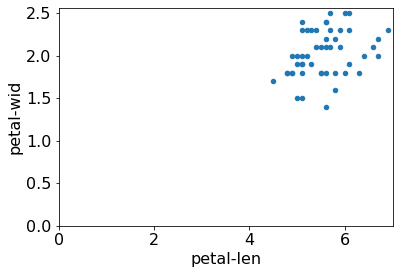

In [8]:
df.plot.scatter(x='petal-len', y='petal-wid', xlim=0, ylim=0)

This gives the reader a better perspective on the data, but one still need to nead the axis labels closely to determine whether the length or petal dimensions are greater.  When we want to make such comparisons, it makes sense to force the axes to cover the same range.  In this case, we can pass tuples for xlim and ylim instead, as `xlim=(start,end)` and `ylim=(start,end)`.

<AxesSubplot:xlabel='petal-len', ylabel='petal-wid'>

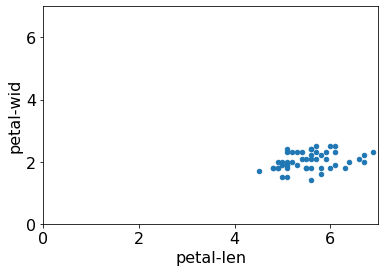

In [9]:
df.plot.scatter(x='petal-len', y='petal-wid', xlim=(0,7), ylim=(0,7))

But be careful!  It's very easy to miss data this way without realizing it.  For example, what happens if we have a 5x5 plot?

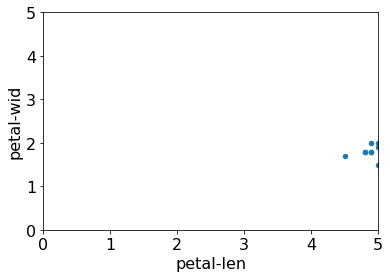

In [10]:
ax = df.plot.scatter(x='petal-len', y='petal-wid', xlim=(0,5), ylim=(0,5))

Unfortunately, there's no error!  We'll have to do our own checking to make sure we get a warning in such cases.

Notice we retrieved the ax object above.  We can use `ax.get_xlim()` and `ax.get_ylim()` to get tuple ranges and check against the data ranges with some asserts.  You may want to keep the following snippet handy and copy/paste it to check when you're plotting.

In [11]:
try:
    assert df[ax.get_xlabel()].min() >= ax.get_xlim()[0]
    assert df[ax.get_xlabel()].max() <= ax.get_xlim()[1]
    assert df[ax.get_ylabel()].min() >= ax.get_ylim()[0]
    assert df[ax.get_ylabel()].max() <= ax.get_ylim()[1]
except:
    print("WARNING!  Data out of range!\n" * 10)

WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!



Or, better, don't put a try/except around the asserts so that your notebook crashes rather than proceeding with a warning that you may (or may not) notice.

# Log Axis

Sometimes we want to plot very large and very small numbers in the same plot.  Here's an example.

In [12]:
s = Series([1,10,100,1000,10000,100000], index=[2010, 2011, 2012, 2013, 2014, 2015])
s

2010         1
2011        10
2012       100
2013      1000
2014     10000
2015    100000
dtype: int64

<AxesSubplot:>

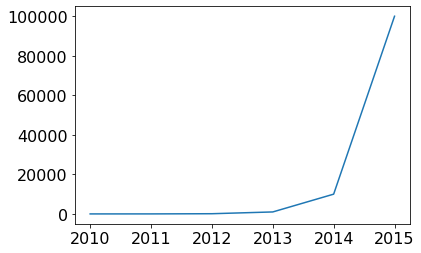

In [13]:
s.plot.line()

The problem with this plot is that the values from 2010 until 2013 look basically the same, even though the value at 2013 is 1000x greater than the value at 2010.  This is because relative to a plot like this that maxes out at 100 thousand, 1 and 1K are both approximately zero.

This is an example of a linear plot.  The difference between any two ticks is the same.  For example, the difference between the first two is 20K (20K - 0).  The different between the last two is also 20K (100K - 80K).

An alternative to a linear scale in a logarithmic scale.  Let's review logs now.  We'll focus on the intuition rather than the math.

You might remember that if `y == 10 ** n`, then `n == math.log10(y)`.

Let's take a look at the logs of a few examples.

In [14]:
import math

examples = []
n = 1
while n <= 1000000:
    examples.append({"n":n, "log(n)":math.log10(n)})
    n *= 10
    
# note that in the table, log(n) is base 10, whereas math.log in Python is base e
DataFrame(examples, columns=["n", "log(n)"])

,n,log(n)
0,1,0.0
1,10,1.0
2,100,2.0
3,1000,3.0
4,10000,4.0
5,100000,5.0
6,1000000,6.0


Notice a pattern?  For the numbers we chose, `log(n)` is the number of 0's in the number.  For example, `log(100)` is 2, because there are 2 zeros when we write the number.

Instead of the actual mathematical definition, let's go with an intuitive, approximate definition:

> log(n) is approximately the number of digits you need to write to express n

Now, this definition isn't perfect.  It doesn't work at all for decimal numbers (e.g., 3.14159).  And, of course, it's approximate.  One million (1000000) is 7 digits, but log(1000000) is 6.  But we can say this: for positive integers n, log(n) will be close to the number of digits it takes to write n (by "close", we mean that it is at most one off).

That's why logs make it easier to talk about big numbers.  For example, consider these very large numbers:
> x = 152435624001
>
> y = 144432245562123

If we want to compare these large numbers, it's much to talk about the number of digits.  For example, we can talk about the approximate magnitudes by stating that "**x** is a 12-digit number and **y** is a 15-digit number".

If we use logs, we'll get numbers close to 12 and 15: "**log(x)** is 11.18 and **log(y)** is 14.15".

This makes a log scale great for communicating about both big and small numbers.  Relative to 1000000, 1 and 10 both look like approximately 0 on a linear scale.  But if I tell you that the biggest number takes 7-digits to write, but there are also 1-digit and 2-digits numbers, you can realize that the small numbers do differ significantly, even though they are dwarfed by the large numbers.

We can easily use a log scale by passing `logy=True` to the `line` method.

In [15]:
s = Series([1,10,100,1000,10000,100000], index=[2010, 2011, 2012, 2013, 2014, 2015])
s

2010         1
2011        10
2012       100
2013      1000
2014     10000
2015    100000
dtype: int64

<AxesSubplot:>

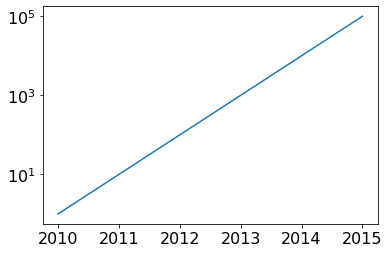

In [16]:
s.plot.line(logy=True)

In the above plot, for each major tick that we move up along the y-axis, the numbers we're writing would take about 1 more digit to express.

# Example: Stock Returns

Previously, we plotted how money grows over time if invested generally in the US stock market (as represented by the S&P 500).  Let's recreate that plot.

In [17]:
returns = pd.read_csv("sp500.csv").set_index("year")
returns.head()

,return
year,
1970,1.0401
1971,1.1431
1972,1.1898
1973,0.8534
1974,0.7353


<AxesSubplot:xlabel='year'>

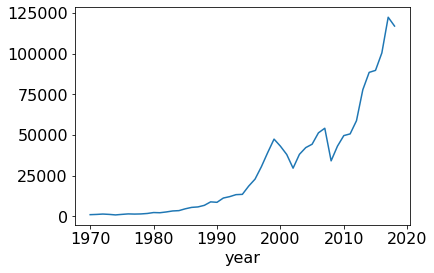

In [18]:
(1000 * returns['return'].cumprod()).plot.line()

The above plot indicates that if \\$1000 was consistently invested in U.S. stocks from 1970 to present, it would be worth about \\$120K today.

The plot is also misleading.  It looks like returns were tiny from 1970 until 1990, and only started growing exponentially in recent years.  However, stocks were also growing exponentially in those early years as well.  It's just that \\$1K and \\$2K both look like nothing compared to \\$120K, even though going from \\$1K to \\$2K is the same return as from \\$10K to \\$20K.  If we pass `logy=True`, a \\$1K to \\$2K jump will cover the same amount of vertical spaces as a \\$10K to \\$20K jump.

<AxesSubplot:xlabel='year'>

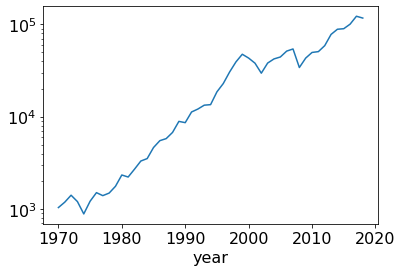

In [19]:
(1000 * returns['return'].cumprod()).plot.line(logy=True)

This plot shows the true steady long-term trend over the last 47 years.

# Multiple Plots per Figure

Remember that when calling a `df.plot.METHOD` plotting method, an axes object is returned.  We can also pass an `ax=AXES` argument to specify in what area to plot the data.  So far, we have seen two uses for this: (1) it lets us plot data from different DataFrames in the same area, and (2) we can adjust tick marks and labels.

Now we'll learn a third use: (3) we can break a single figure into multiple side-by-side axes objects and plot in each.

To do this, we'll need to import `pyplot` from the `matplotlib` module directly.  This is done as follows by convention:

In [20]:
from matplotlib import pyplot as plt

The method we want to use from `plt` is `subplots`.  It produce a grid of axes areas.  It takes a few optional arguments:
* ncols: how many columns to have in the matrix
* nrows: how many rows to have in the matrix
* figsize: the dimensions of the whole figure (this is the same as the figsize argument we've seen passed to plot functions previously)

Let's try just specifying either `ncols` or `nrows`:

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

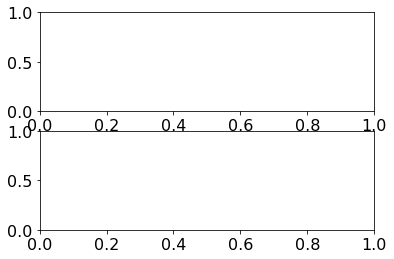

In [21]:
plt.subplots(nrows=2)

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

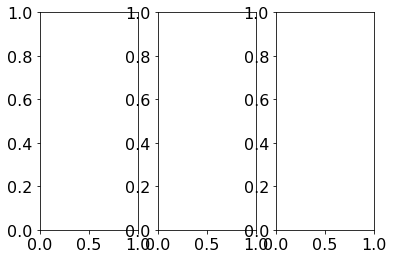

In [22]:
plt.subplots(ncols=3)

You can also specify both, though we won't provide any real examples of doing so beyond the following:

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

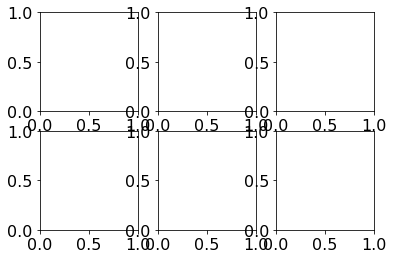

In [23]:
plt.subplots(nrows=2, ncols=3)

Notice that in addition to drawing several axes areas, the method returns a tuple with two entries.  The first entry is a figure object (which we'll ignore), and the second is a collection of axes objects.  Let's peek at each of these.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


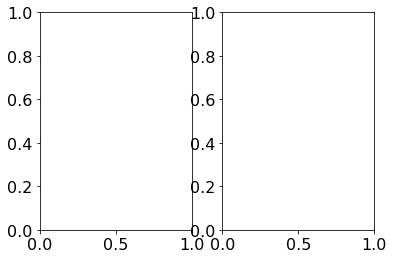

In [24]:
t = plt.subplots(ncols=2)
print(type(t[0]))

ax_list = list(t[1])
for ax in ax_list:
    print(type(ax))

We can plot in each of these individually.

<AxesSubplot:>

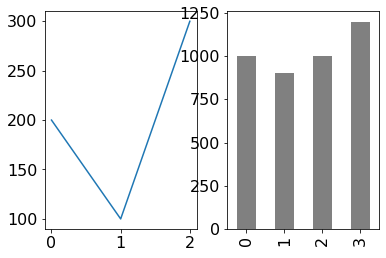

In [25]:
t = plt.subplots(ncols=2)
ax_list = list(t[1])

series1 = Series([200,100,300])
series2 = Series([1000,900,1000,1200])

series1.plot.line(ax=ax_list[0])
series2.plot.bar(ax=ax_list[1], color="gray")

We have two plots side-by-side, but the labels overlap a bit.  In the same cell that produces a plot, you can call [plt.subplots_adjust](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) to change the spacing.  An `hspace` argument specifies height space between rows, and a `wspace` specified width space between columns.

We'll do the same example before, with one more line at the end to create some whitespace.  We'll also modify the subplots coll to make the figure wider.

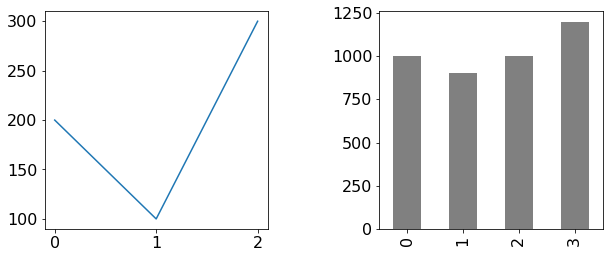

In [26]:
t = plt.subplots(ncols=2, figsize=(10,4))
ax_list = list(t[1])

series1 = Series([200,100,300])
series2 = Series([1000,900,1000,1200])

series1.plot.line(ax=ax_list[0])
series2.plot.bar(ax=ax_list[1], color="gray")

plt.subplots_adjust(wspace=0.5)

# Example: Revisiting Irises

Previously, we saw how we could plot petal width and petal length for different Iris varieties in the same plot area.  Now, we'll see how to do this in three adjacent plots.

In [27]:
df = pd.read_csv('iris.data',
                 names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df.head()

,sepal-len,sepal-wid,petal-len,petal-wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
name_counts = df['name'].value_counts()
name_counts

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: name, dtype: int64

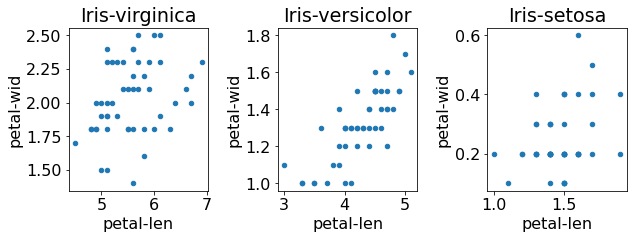

In [29]:
t = plt.subplots(ncols=len(name_counts), figsize=(10,3))
plt.subplots_adjust(wspace=0.5)

ax_list = list(t[1])

for name in name_counts.index:
    ax = ax_list.pop(0)
    df[df['name'] == name].plot.scatter(x='petal-len', y='petal-wid', ax=ax, title=name)

The plots are side-by-side.  But it's hard to compare across them because they each have different limits.  We can force them to share limits by passing `sharex=True` and/or `sharey=True` to the subplots function.  The following is a repeat of the earlier example with both x and y axes shared.

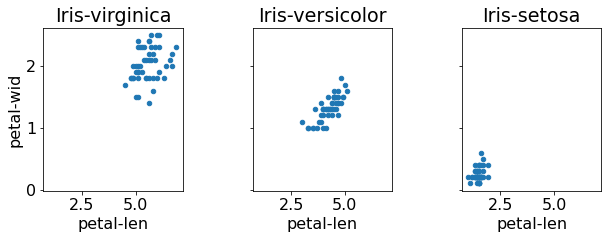

In [30]:
t = plt.subplots(ncols=len(name_counts), figsize=(10,3), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.5)

ax_list = list(t[1])

for name in name_counts.index:
    ax = ax_list.pop(0)
    df[df['name'] == name].plot.scatter(x='petal-len', y='petal-wid', ax=ax, title=name)

This works fine!  Although the version where we used color and placed all three on the same plot was probably more intuitive.  So why might we want to split it up this way?  Because it gives us another plot dimension that we could use to communicate more attributes.

Remember that when you're creating a plot, you should list ass the data attributes and the plot variables you can control.  In this case:

**data attributes:**
1. petal width
2. petal length
3. sepal width
4. sepal length
5. iris type

**plot variables:**
1. x
2. y
3. color
4. dot size
5. which of the adjacent plot areas

In theory, this means we could communicate everything about our data in a single figure.  We suggest you try exactly that for practice!  Of course, this might be too much information for one figure; it's probably best to communicate what we want with a few different figures.

# Picking the Right Plot

In this section, we're going to show two plots of the same data side-by-side.  Your job is to think carefully about which plot communicates better.

As you go through, make a note of which plot you think is better.  If it depends on what is being communicated, make a note of that too.  At the end, I'll share my opinion about which plot is better out of each pair.

Don't worry if we use some plotting features you haven't see yet; the point is to just think about which plot communicates most effectively.

In [31]:
# return list of two axes objects
def plot_pair(n):
    t = plt.subplots(ncols=2, figsize=(14,6))
    plt.subplots_adjust(wspace=0.5)
    t[0].suptitle("Plot "+str(n), fontsize=24)
    return list(t[1])

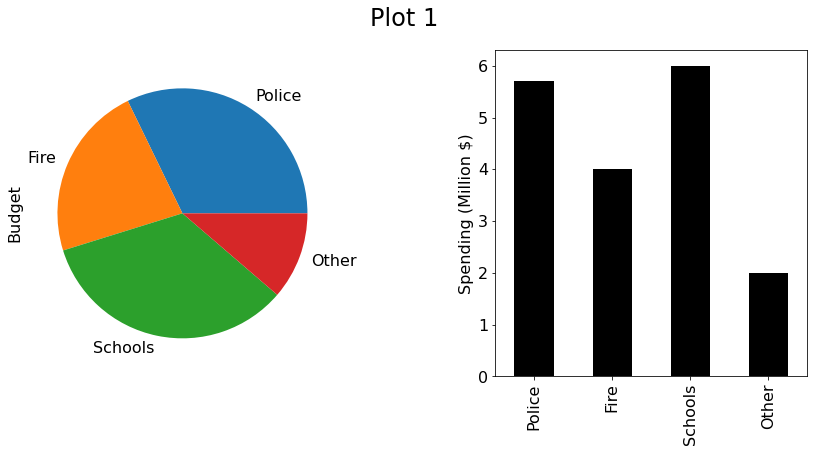

In [32]:
ax = plot_pair(1)
budget = Series([5.7,4,6,2], index=["Police", "Fire", "Schools", "Other"], name="Budget")

# plot 1
budget.plot.pie(ax=ax[0])

# plot 2
budget.plot.bar(ax=ax[1], color="black")
ax[1].set_ylabel("Spending (Million $)")

None

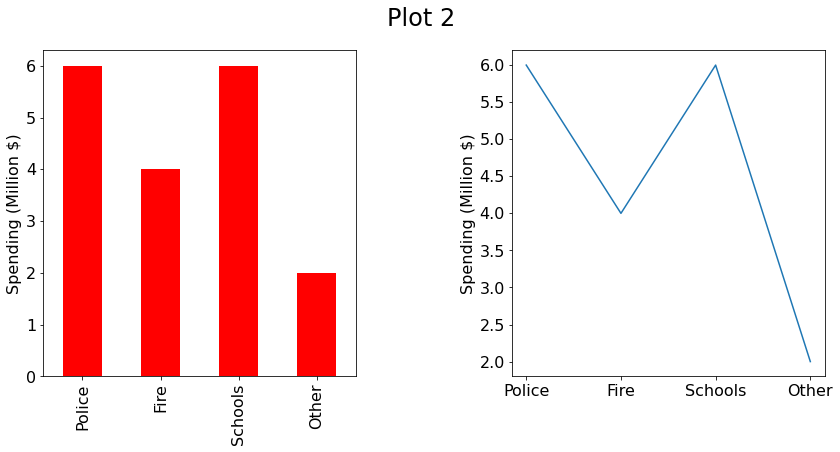

In [33]:
ax = plot_pair(2)
budget = Series([6,4,6,2], index=["Police", "Fire", "Schools", "Other"], name="Budget")

# plot 1
budget.plot.bar(ax=ax[0], color="red")
ax[0].set_ylabel("Spending (Million $)")

# plot 2
budget.plot.line(ax=ax[1])
ax[1].set_xticks(range(len(budget.index)))
ax[1].set_xticklabels(budget.index)
ax[1].set_ylabel("Spending (Million $)")

None

<AxesSubplot:xlabel='petal-len', ylabel='petal-wid'>

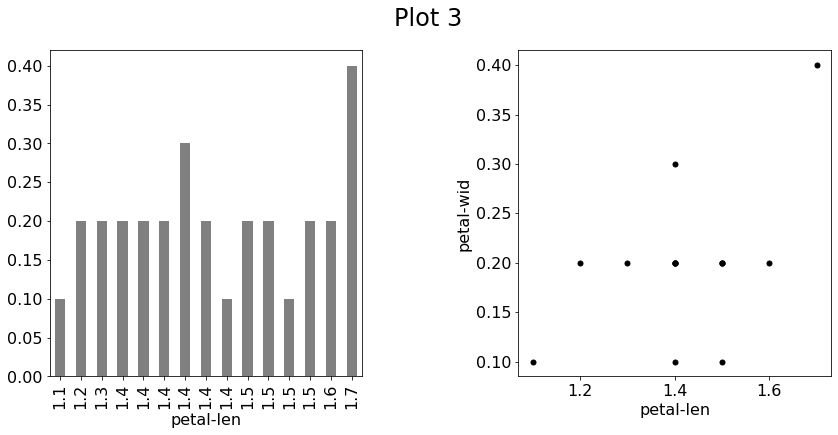

In [34]:
ax = plot_pair(3)
df = pd.read_csv('iris.data',
                 names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df = df[['petal-len', 'petal-wid']].head(15).sort_values(by='petal-len')

# plot 1
df.plot.bar(x='petal-len', y='petal-wid', ax=ax[0], color="gray", legend=False)

# plot 2
df.plot.scatter(x='petal-len', y='petal-wid', ax=ax[1], c='black', s=25)

Text(0, 0.5, 'Height (Inches)')

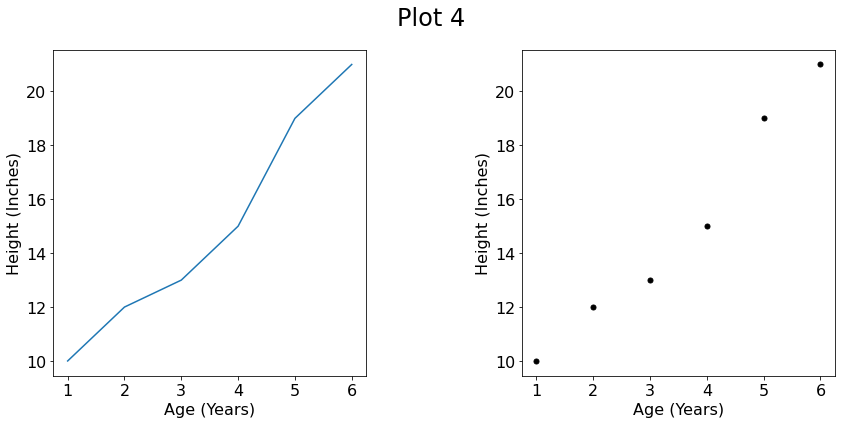

In [35]:
ax = plot_pair(4)
height = Series([10, 12, 13, 15, 19, 21], index=[1, 2, 3, 4, 5, 6])

# plot 1
height.plot.line(ax=ax[0])
ax[0].set_xlabel("Age (Years)")
ax[0].set_ylabel("Height (Inches)")

# plot 2
DataFrame({'x':height.index, 'y':height.values}).plot.scatter(x='x', y='y', ax=ax[1], c='black', s=25)
ax[1].set_xlabel("Age (Years)")
ax[1].set_ylabel("Height (Inches)")

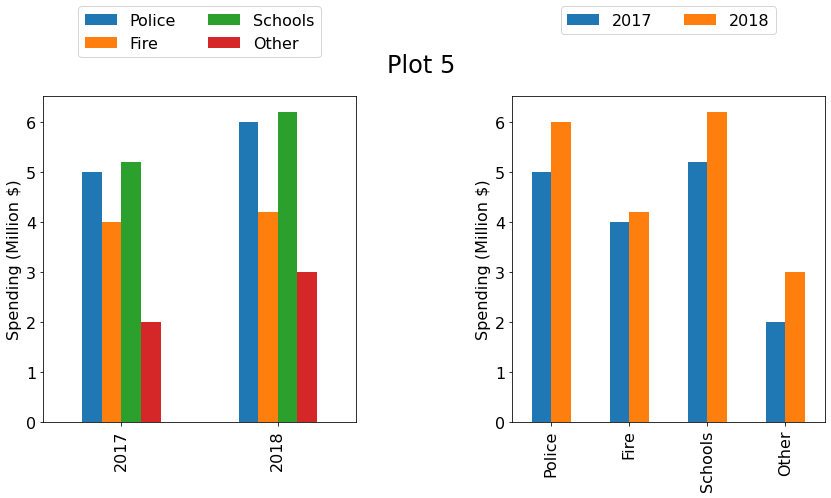

In [36]:
ax = plot_pair(5)
year2017 = Series([5,4,5.2,2], index=["Police", "Fire", "Schools", "Other"], name="2017")
year2018 = Series([6,4.2,6.2,3], index=["Police", "Fire", "Schools", "Other"], name="2018")
df = DataFrame([year2017, year2018])

# plot 1
df.plot.bar(ax=ax[0])
ax[0].set_ylabel("Spending (Million $)")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# plot 2
df.transpose().plot.bar(ax=ax[1])
ax[1].set_ylabel("Spending (Million $)")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

None

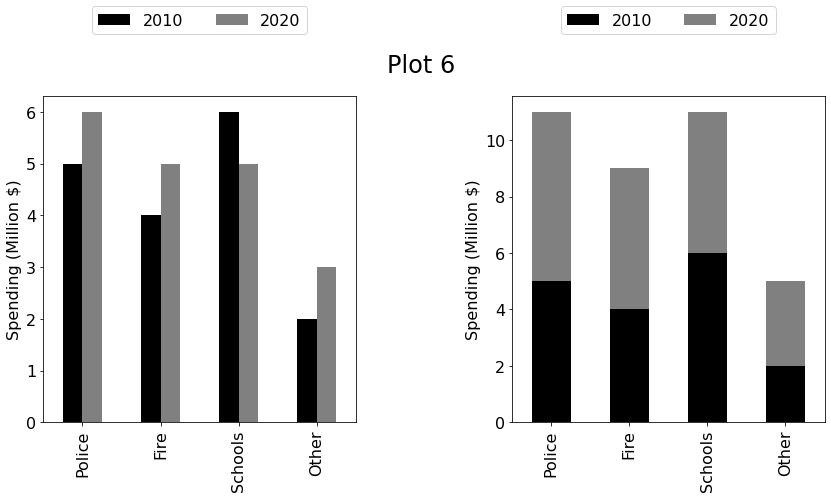

In [37]:
ax = plot_pair(6)
year2017 = Series([5,4,6,2], index=["Police", "Fire", "Schools", "Other"], name="2010")
year2018 = Series([6,5,5,3], index=["Police", "Fire", "Schools", "Other"], name="2020")
df = DataFrame([year2017, year2018])

# plot 1
df.transpose().plot.bar(ax=ax[0], color=["black", "gray"])
ax[0].set_ylabel("Spending (Million $)")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# plot 2
df.transpose().plot.bar(ax=ax[1], color=["black", "gray"], stacked=True)
ax[1].set_ylabel("Spending (Million $)")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

None

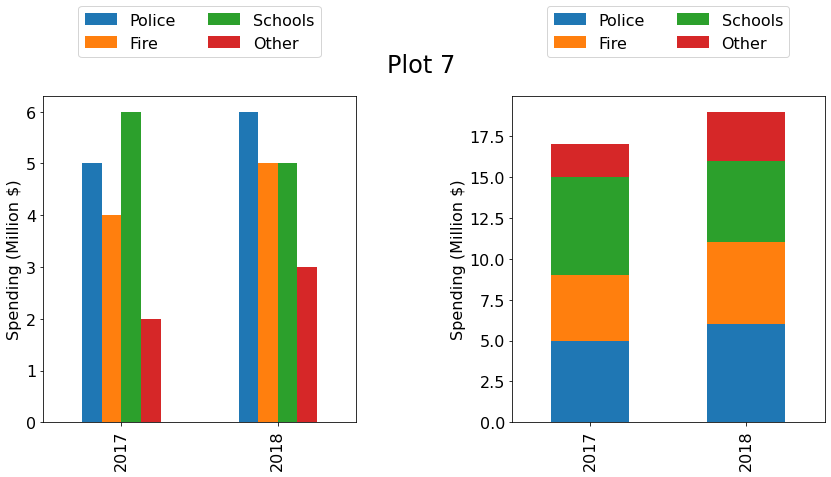

In [38]:
ax = plot_pair(7)
year2017 = Series([5,4,6,2], index=["Police", "Fire", "Schools", "Other"], name="2017")
year2018 = Series([6,5,5,3], index=["Police", "Fire", "Schools", "Other"], name="2018")
df = DataFrame([year2017, year2018])

# plot 1
df.plot.bar(ax=ax[0])
ax[0].set_ylabel("Spending (Million $)")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# plot 2
df.plot.bar(ax=ax[1], stacked=True)
ax[1].set_ylabel("Spending (Million $)")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

None

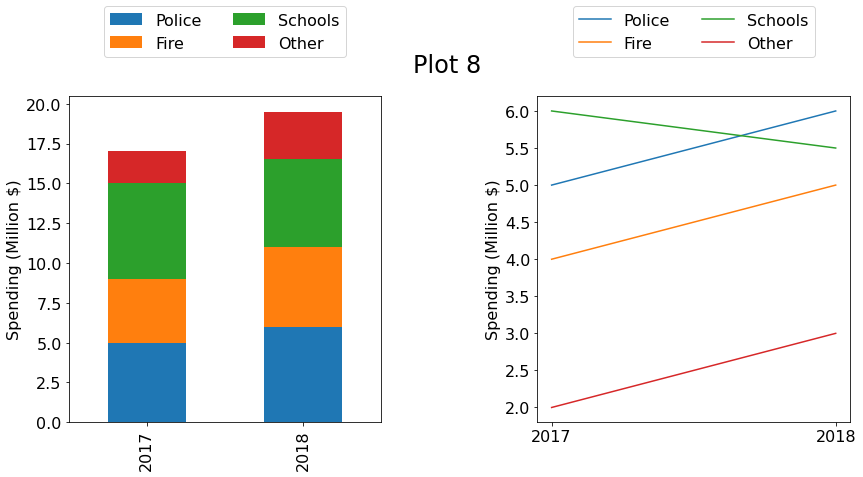

In [39]:
ax = plot_pair(8)
year2017 = Series([5,4,6,2], index=["Police", "Fire", "Schools", "Other"], name="2017")
year2018 = Series([6,5,5.5,3], index=["Police", "Fire", "Schools", "Other"], name="2018")
df = DataFrame([year2017, year2018])

# plot 1
df.plot.bar(ax=ax[0], stacked=True)
ax[0].set_ylabel("Spending (Million $)")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# plot 2
df.plot.line(ax=ax[1])
ax[1].set_ylabel("Spending (Million $)")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
ax[1].set_xticks(range(len(df.index)))
ax[1].set_xticklabels(df.index)

None

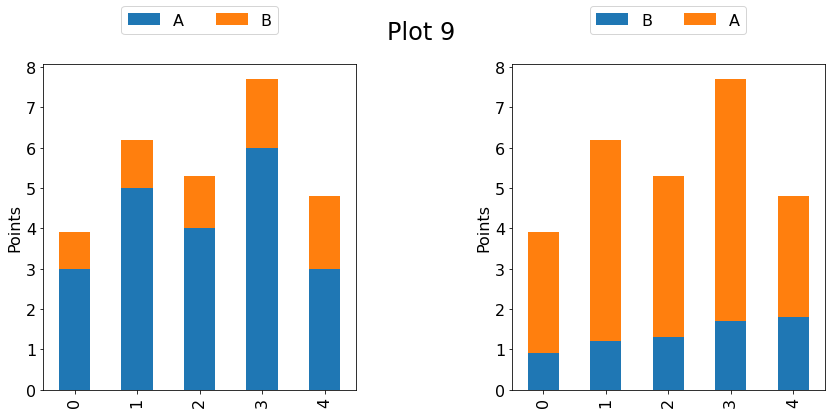

In [40]:
ax = plot_pair(9)
df = DataFrame({
    "A": [3, 5, 4, 6, 3],
    "B": [0.9, 1.2, 1.3, 1.7, 1.8]
})

# plot 1
df.plot.bar(ax=ax[0], stacked=True)
ax[0].set_ylabel("Points")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# plot 2
df[["B", "A"]].plot.bar(ax=ax[1], stacked=True)
ax[1].set_ylabel("Points")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

None

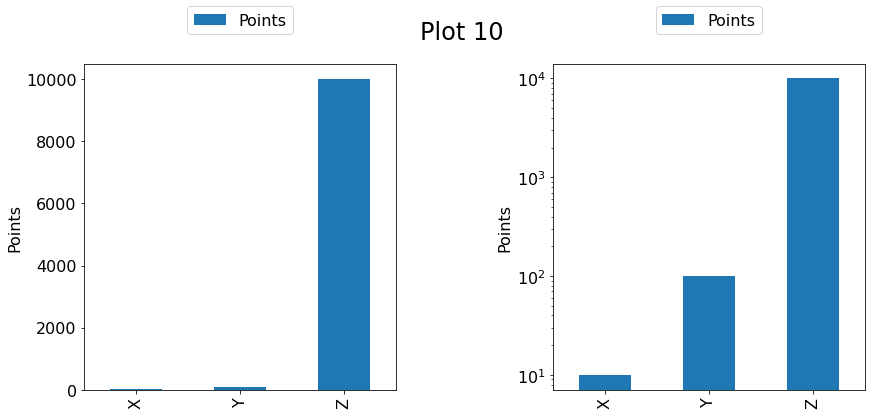

In [41]:
ax = plot_pair(10)
df = DataFrame({
    "Points": [10, 100, 10000]
}, index=["X", "Y", "Z"])

# plot 1
df.plot.bar(ax=ax[0], stacked=True)
ax[0].set_ylabel("Points")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# plot 2
df.plot.bar(ax=ax[1], stacked=True, logy=True)
ax[1].set_ylabel("Points")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

None

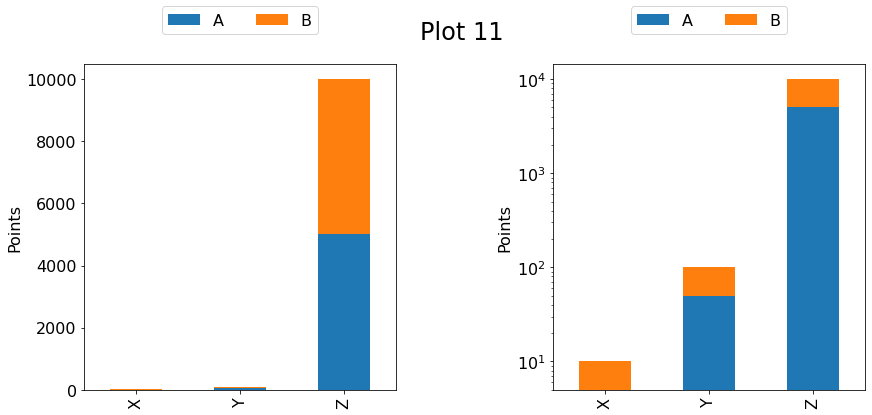

In [42]:
ax = plot_pair(11)
df = DataFrame({
    "A": [5, 50, 5000],
    "B": [5, 50, 5000]
}, index=["X", "Y", "Z"])

# plot 1
df.plot.bar(ax=ax[0], stacked=True)
ax[0].set_ylabel("Points")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# plot 2
df.plot.bar(ax=ax[1], stacked=True, logy=True)
ax[1].set_ylabel("Points")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

None

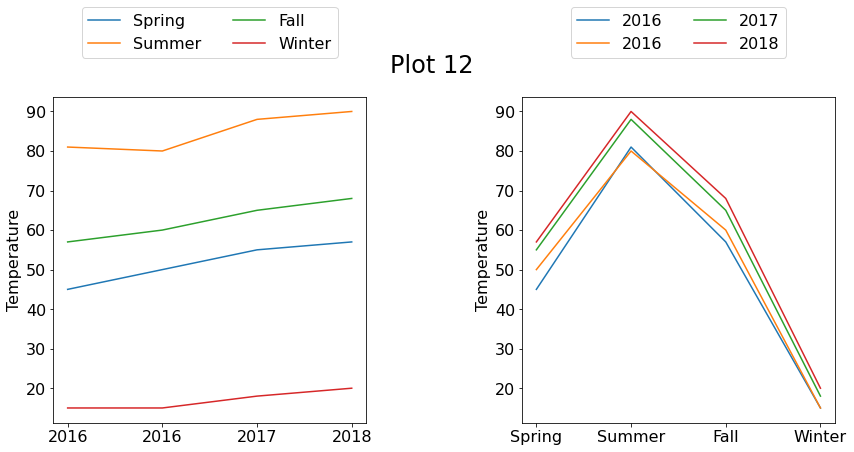

In [43]:
ax = plot_pair(12)
df = DataFrame([
    Series([45,81,57,15], index=["Spring", "Summer", "Fall", "Winter"], name="2016"),
    Series([50,80,60,15], index=["Spring", "Summer", "Fall", "Winter"], name="2016"),
    Series([55,88,65,18], index=["Spring", "Summer", "Fall", "Winter"], name="2017"),
    Series([57,90,68,20], index=["Spring", "Summer", "Fall", "Winter"], name="2018"),
])

# plot 1
df.plot.line(ax=ax[0])
ax[0].set_ylabel("Temperature")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
ax[0].set_xticks(range(len(df.index)))
ax[0].set_xticklabels(df.index)

# plot 2
df = df.transpose()
df.plot.line(ax=ax[1])
ax[1].set_ylabel("Temperature")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
ax[1].set_xticks(range(len(df.index)))
ax[1].set_xticklabels(df.index)

None

# The Right Plots (Tyler's Humble Opinions)

In some cases, one of above plots in a pair is clearly better, but other times it is a matter of taste, or of what the plot is primarily trying to communicate.  Here are some arguments regarding which plot to choose:

1. **Right**.  With the bars, it is easier to see that Schools>Police (this is hard to see with the pie chart.  The bar plot also makes it easier to read off absolute numbers.  The one argument for the pie chart is that it makes certain combinations easier to see.  For example, it is easier to see that Police+Fire is the majority of the budge in the pie chart than in the bar plot.

2. **Left**.  Never use line plots for categorical data.

3. **Right**.  When there can be more than one y-value for each x-value, and the different y-values don't correspond to named categories, then scatter is the way to go.

4. **Left**.  We're looking for a trend, and the line makes it much clearer.

5. **Depends**.  Adjacent bars are easier to compare, so we need to think about which comparisons are most important for the reader to make.  For example, the left plot makes it easier to observe that school spending is always a bit more than police spending, whereas the right plot makes it easier to see that spending is increasing across all categories.

6. **Left**.  Don't stack bars unless it makes sense to look at the bars as part of a whole.  It's not clear what a meaningful "whole" could be in the right plot (spending across first years of a decade?).

7. **Depends**.  The left makes it easier to compare the sizes of the bars, but the right makes it easier to sum them.  Are you making a point about the relative sizes or about the cumulative amounts?

8. **Depends**.  A line plot looks a little strange with only two points, but it does make some points better (e.g., if you're trying to show that school spending is the only thing decreasing over time).  The left plot definitely looks nicer, and does a better job of communicating what is happening with overall spending.

9. **Right**.  When you're stacking bars, the first bar is special, because it's easier to make comparisons across the x-axis for that category.  In the left, it's very hard to see the subtle upward trend in B.  In the right, this is evident.  A is generally so much bigger than B that it's easy to see what's happening with that variable either way.

10. **Right**.  This is an obvious use case for a log scale.  On the left, it's very hard to compare X and Y, because both are dwarfed by Z.  On the right, we can see that Y is 10x larger than X, and Z is 100X larger than Y.

11. **Left**.  Never do stacked bars with a log scale.  A distance towards the top of a plot represents a larger absolute quantity than the same distance near the bottom.  This means that the first bar in the stack will look much bigger than it really is.  For example, even though A and B are always equal, A misleadingly looks much, much larger in the right plot.

12. **Depends**.  Each data point has two dimensions: season and year.  We're mapping these to two plot dimensions: x-axis and which line.  Which data dimension should map to which plot dimensions?  The most important data dimension should be on the x-axis, because that's easier to see.  So if we're trying to show things are getting warmer of the years, the left plot is better.  If we're trying to show what the experience is like throughout the year, the right plot is better.

# Conclusion

In this reading, we've learned how to control the x-axis and y-axis limits, overriding the defaults that matplotlib might choose.  We've also learned how to create pairs of adjacent plots, sometimes sharing the same axes.

Finally, we've thought about how to communicate effectively with plots by comparing 13 pairs of examples.  We learned several design principals from this exploration, including:
* use log scale when very large and very small data must be shown in the same plot
* never use stacked bars in combination with a log scale
* never use a line plot over a categorical x-axis
* adjacent bars are easier to compare than non-adjacent bars
* when there are quantities for every combination of two variables and the data is being represented with multiple lines, the more important data dimension should be aligned along the x-axis